In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
%matplotlib inline

## Plot styling
plt.style.use('seaborn-poster')  # Better sizing
plt.style.use('seaborn-white')   # White background

In [2]:
## MAF Specifications
## https://docs.gdc.cancer.gov/Data/File_Formats/MAF_Format/
## https://wiki.nci.nih.gov/display/TCGA/Mutation+Annotation+Format+(MAF)+Specification

in_path_varscan = 'data/maf/6c93f518-1956-4435-9806-37185266d248/TCGA.BRCA.varscan.6c93f518-1956-4435-9806-37185266d248.DR-10.0.somatic.maf.gz'
in_path_muse = 'data/maf/b8ca5856-9819-459c-87c5-94e91aca4032/TCGA.BRCA.muse.b8ca5856-9819-459c-87c5-94e91aca4032.DR-10.0.somatic.maf.gz'
in_path_ss = 'data/maf/7dd592e3-5950-4438-96d5-3c718aca3f13/TCGA.BRCA.somaticsniper.7dd592e3-5950-4438-96d5-3c718aca3f13.DR-10.0.somatic.maf.gz'
in_path_mutect = 'data/maf/995c0111-d90b-4140-bee7-3845436c3b42/TCGA.BRCA.mutect.995c0111-d90b-4140-bee7-3845436c3b42.DR-10.0.somatic.maf.gz'

# 1 Reading & Cleaning

## Read single file

In [35]:
df = pd.read_table(
    in_path_mutect,
    comment = '#'
)

/home/carlos/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (87,88,118) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Preview data

In [36]:
print(df.shape)
df.head(10)

(120988, 120)


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,FILTER,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status
0,USP24,23358,WUGSC,GRCh38,chr1,55159655,55159655,+,Missense_Mutation,SNP,...,panel_of_normals,CTGGATTGTAG,d083d669-6646-463b-853e-c58da8d06439,4374e19d-c5e7-49cf-8707-05ae5aeb7369,aadee87c-6a68-4580-bd10-64ac273b1e3d,0130d616-885e-4a6c-9d03-2f17dd692a05,common_in_exac;gdc_pon,NaN,True,Unknown
1,ERICH3,127254,WUGSC,GRCh38,chr1,74571494,74571494,+,Missense_Mutation,SNP,...,PASS,TTCCTCTACCA,d083d669-6646-463b-853e-c58da8d06439,4374e19d-c5e7-49cf-8707-05ae5aeb7369,aadee87c-6a68-4580-bd10-64ac273b1e3d,0130d616-885e-4a6c-9d03-2f17dd692a05,NaN,COSM1474194,True,Unknown
2,KIF26B,55083,WUGSC,GRCh38,chr1,245419680,245419680,+,Silent,SNP,...,PASS,GCCTCGCAGGG,d083d669-6646-463b-853e-c58da8d06439,4374e19d-c5e7-49cf-8707-05ae5aeb7369,aadee87c-6a68-4580-bd10-64ac273b1e3d,0130d616-885e-4a6c-9d03-2f17dd692a05,NaN,COSM1473725;COSM1473726,True,Unknown
3,USP34,9736,WUGSC,GRCh38,chr2,61189055,61189055,+,Silent,SNP,...,PASS,AAAGCGAGTGC,d083d669-6646-463b-853e-c58da8d06439,4374e19d-c5e7-49cf-8707-05ae5aeb7369,aadee87c-6a68-4580-bd10-64ac273b1e3d,0130d616-885e-4a6c-9d03-2f17dd692a05,NaN,COSM1483177,True,Unknown
4,ANTXR1,84168,WUGSC,GRCh38,chr2,69245305,69245305,+,Silent,SNP,...,PASS,TCCTCGCCGCC,d083d669-6646-463b-853e-c58da8d06439,4374e19d-c5e7-49cf-8707-05ae5aeb7369,aadee87c-6a68-4580-bd10-64ac273b1e3d,0130d616-885e-4a6c-9d03-2f17dd692a05,NaN,COSM1409122,True,Unknown
5,SCN9A,6335,WUGSC,GRCh38,chr2,166199365,166199365,+,Silent,SNP,...,PASS,AGTATGACTGC,d083d669-6646-463b-853e-c58da8d06439,4374e19d-c5e7-49cf-8707-05ae5aeb7369,aadee87c-6a68-4580-bd10-64ac273b1e3d,0130d616-885e-4a6c-9d03-2f17dd692a05,NaN,COSM1482144;COSM4814664,True,Unknown
6,FN1,2335,WUGSC,GRCh38,chr2,215397809,215397809,+,Nonsense_Mutation,SNP,...,PASS,CACTTCTCGTG,d083d669-6646-463b-853e-c58da8d06439,4374e19d-c5e7-49cf-8707-05ae5aeb7369,aadee87c-6a68-4580-bd10-64ac273b1e3d,0130d616-885e-4a6c-9d03-2f17dd692a05,NaN,COSM1482746;COSM1482747,True,Unknown
7,SPHKAP,80309,WUGSC,GRCh38,chr2,228016738,228016738,+,Missense_Mutation,SNP,...,PASS,TCTTTCCTCGG,d083d669-6646-463b-853e-c58da8d06439,4374e19d-c5e7-49cf-8707-05ae5aeb7369,aadee87c-6a68-4580-bd10-64ac273b1e3d,0130d616-885e-4a6c-9d03-2f17dd692a05,NaN,COSM1482832;COSM1482833,True,Unknown
8,HRH1,3269,WUGSC,GRCh38,chr3,11259653,11259653,+,Missense_Mutation,SNP,...,PASS,TGCTCATGCTC,d083d669-6646-463b-853e-c58da8d06439,4374e19d-c5e7-49cf-8707-05ae5aeb7369,aadee87c-6a68-4580-bd10-64ac273b1e3d,0130d616-885e-4a6c-9d03-2f17dd692a05,NaN,COSM1484451,True,Unknown
9,LRRC2,79442,WUGSC,GRCh38,chr3,46519054,46519054,+,Missense_Mutation,SNP,...,panel_of_normals,AGCTGGGAACA,d083d669-6646-463b-853e-c58da8d06439,4374e19d-c5e7-49cf-8707-05ae5aeb7369,aadee87c-6a68-4580-bd10-64ac273b1e3d,0130d616-885e-4a6c-9d03-2f17dd692a05,gdc_pon,COSM1485224,True,Unknown


## Read & concatenate multiple files

In [34]:
## Define column types
col_type_map = {
    'Chromosome': np.unicode,
    'Start_Position': np.int64,
    'End_Position': np.int64,
    'SYMBOL': np.unicode,
    'Reference_Allele': np.unicode,
    'Allele': np.unicode,
    'Variant_Classification': np.unicode,
    'IMPACT': np.unicode,
    'Variant_Type': np.unicode,
    'Tumor_Sample_Barcode': np.unicode,
}
keep_cols = col_type_map.keys()

## Concatenate vertically
in_paths = [
    in_path_varscan, 
    in_path_muse, 
    in_path_ss, 
    in_path_mutect
]
df = pd.concat([
        pd.read_table(
            path, 
            dtype = col_type_map,
            usecols = keep_cols,
            comment = '#'
        )
        for path in in_paths],
    ignore_index = True
)

print(df.shape)
df.head()

(370461, 10)


,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Sample_Barcode,Allele,SYMBOL,IMPACT
0,chr1,1916819,1916819,Missense_Mutation,SNP,C,TCGA-A2-A3Y0-01A-11D-A23C-09,G,CALML6,MODERATE
1,chr1,2172304,2172304,Missense_Mutation,SNP,G,TCGA-A2-A3Y0-01A-11D-A23C-09,C,PRKCZ,MODERATE
2,chr1,3766586,3766586,Missense_Mutation,SNP,G,TCGA-A2-A3Y0-01A-11D-A23C-09,A,CCDC27,MODERATE
3,chr1,6040634,6040634,Silent,SNP,G,TCGA-A2-A3Y0-01A-11D-A23C-09,C,KCNAB2,LOW
4,chr1,23961791,23961791,Missense_Mutation,SNP,A,TCGA-A2-A3Y0-01A-11D-A23C-09,G,PNRC2,MODERATE


## Rename and reorder columns

In [6]:
## Rename
col_name_map = OrderedDict([
    ('Chromosome', 'CHR'),
    ('Start_Position', 'START'),
    ('End_Position', 'END'),
    ('SYMBOL', 'GENE'),
    ('Reference_Allele', 'REF'),
    ('Allele', 'ALT'),
    ('Variant_Classification', 'CLASS'),
    ('IMPACT', 'IMPACT'),
    ('Variant_Type', 'TYPE'),
    ('Tumor_Sample_Barcode', 'BARCODE'),
])
df.rename(columns=col_name_map, inplace=True)

## Reorder
keep_cols = list(col_name_map.values()) # Need list() because its odict
df = df[keep_cols]

print(df.shape)
df.head()

(370461, 10)


,CHR,START,END,GENE,REF,ALT,CLASS,IMPACT,TYPE,BARCODE
0,chr1,1916819,1916819,CALML6,C,G,Missense_Mutation,MODERATE,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09
1,chr1,2172304,2172304,PRKCZ,G,C,Missense_Mutation,MODERATE,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09
2,chr1,3766586,3766586,CCDC27,G,A,Missense_Mutation,MODERATE,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09
3,chr1,6040634,6040634,KCNAB2,G,C,Silent,LOW,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09
4,chr1,23961791,23961791,PNRC2,A,G,Missense_Mutation,MODERATE,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09


## Fill missing data

In [7]:
df.fillna(
    {'GENE': 'INTERGENIC'},
    inplace = True
)

## Create new columns from string ops

In [8]:
df['SAMPLE'] = df['BARCODE'].str[0:12]
df['MUTATION'] = df['CHR'].str.cat([
    df['GENE'], 
    df['START'].map(str), 
    df['END'].map(str), 
    df['REF'], 
    df['ALT']], 
    sep = ':'
)
df['TYPE2'] = ['SNP' if TYPE == 'SNP' else 'INDEL' for TYPE in df['TYPE']] 

print(df.shape)
df.head()

(370461, 13)


,CHR,START,END,GENE,REF,ALT,CLASS,IMPACT,TYPE,BARCODE,SAMPLE,MUTATION,TYPE2
0,chr1,1916819,1916819,CALML6,C,G,Missense_Mutation,MODERATE,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:CALML6:1916819:1916819:C:G,SNP
1,chr1,2172304,2172304,PRKCZ,G,C,Missense_Mutation,MODERATE,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:PRKCZ:2172304:2172304:G:C,SNP
2,chr1,3766586,3766586,CCDC27,G,A,Missense_Mutation,MODERATE,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:CCDC27:3766586:3766586:G:A,SNP
3,chr1,6040634,6040634,KCNAB2,G,C,Silent,LOW,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:KCNAB2:6040634:6040634:G:C,SNP
4,chr1,23961791,23961791,PNRC2,A,G,Missense_Mutation,MODERATE,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:PNRC2:23961791:23961791:A:G,SNP


## Remove duplicates

In [9]:
## Remove duplicate rows
df.drop_duplicates(inplace = True)

## Remove duplicate based on column(s)
dupe_cols = ['MUTATION']
df_mut = df.drop_duplicates(dupe_cols)

print(df.shape)
print(df_mut.shape)

(132916, 13)
(130625, 13)


## Remove columns

NOTE: Code below gives a warning w/o the setting below.
Happens because we are dropping the output of of .drop_duplicates
command i.e. chaining ops

See the following stack overflows 

https://stackoverflow.com/questions/32752299/pandas-warning-while-trying-to-delete-column

https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas/40214434

In [10]:
pd.options.mode.chained_assignment = None  # default='warn'

drop_cols = ['BARCODE', 'SAMPLE']
df_mut.drop(
    columns = drop_cols,
    inplace = True
)

print(df_mut.shape)
df_mut.head()

(130625, 11)


,CHR,START,END,GENE,REF,ALT,CLASS,IMPACT,TYPE,MUTATION,TYPE2
0,chr1,1916819,1916819,CALML6,C,G,Missense_Mutation,MODERATE,SNP,chr1:CALML6:1916819:1916819:C:G,SNP
1,chr1,2172304,2172304,PRKCZ,G,C,Missense_Mutation,MODERATE,SNP,chr1:PRKCZ:2172304:2172304:G:C,SNP
2,chr1,3766586,3766586,CCDC27,G,A,Missense_Mutation,MODERATE,SNP,chr1:CCDC27:3766586:3766586:G:A,SNP
3,chr1,6040634,6040634,KCNAB2,G,C,Silent,LOW,SNP,chr1:KCNAB2:6040634:6040634:G:C,SNP
4,chr1,23961791,23961791,PNRC2,A,G,Missense_Mutation,MODERATE,SNP,chr1:PNRC2:23961791:23961791:A:G,SNP


## New columns from delimited column

Dummy frame is used because the "new" columns already exist in `df`

In [11]:
## Create dummy frame
df_tmp = df.copy()
drop_cols = [
    'CHR',
    'GENE',
    'START',
    'END',
    'REF',
    'ALT'
]
df_tmp.drop(columns = drop_cols, inplace = True)

## Create new columns
(df_tmp['CHR'], df_tmp['GENE'], df_tmp['START'], 
 df_tmp['END'], df_tmp['REF'], df_tmp['ALT']) = (
    df_tmp['MUTATION'].str.split(':').str )

print(df_tmp.shape)
df_tmp.head()

(132916, 13)


,CLASS,IMPACT,TYPE,BARCODE,SAMPLE,MUTATION,TYPE2,CHR,GENE,START,END,REF,ALT
0,Missense_Mutation,MODERATE,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:CALML6:1916819:1916819:C:G,SNP,chr1,CALML6,1916819,1916819,C,G
1,Missense_Mutation,MODERATE,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:PRKCZ:2172304:2172304:G:C,SNP,chr1,PRKCZ,2172304,2172304,G,C
2,Missense_Mutation,MODERATE,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:CCDC27:3766586:3766586:G:A,SNP,chr1,CCDC27,3766586,3766586,G,A
3,Silent,LOW,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:KCNAB2:6040634:6040634:G:C,SNP,chr1,KCNAB2,6040634,6040634,G,C
4,Missense_Mutation,MODERATE,SNP,TCGA-A2-A3Y0-01A-11D-A23C-09,TCGA-A2-A3Y0,chr1:PNRC2:23961791:23961791:A:G,SNP,chr1,PNRC2,23961791,23961791,A,G


## Writing files

In [12]:
df.to_csv(
    'data/out/df.tsv',
    sep = '\t'
)

## Read & write binary files

In [13]:
pickle_path = 'data/out/df.pkl'

# Write
df.to_pickle(pickle_path)

# Read
df = pd.read_pickle(pickle_path)

## Long to wide

`GENE` and other columns added below

In [14]:
## Create a dummy column w/ fill value
df_tmp = df.copy()
df_tmp['EXISTS'] = 1

## Long-to-wide
df_wide = df_tmp.pivot(
    index = 'MUTATION', 
    columns = 'SAMPLE', 
    values = 'EXISTS'
)
del df_tmp

## Clean-up column names
df_wide.columns = df_wide.columns.values
df_wide.reset_index(inplace = True)

## Fill empty values
df_wide.fillna(0, inplace = True)

print(df_wide.shape)
df_wide.head()

(130625, 987)


,MUTATION,TCGA-3C-AAAU,TCGA-3C-AALI,TCGA-3C-AALJ,TCGA-3C-AALK,TCGA-4H-AAAK,TCGA-5L-AAT0,TCGA-5L-AAT1,TCGA-5T-A9QA,TCGA-A1-A0SD,...,TCGA-UL-AAZ6,TCGA-UU-A93S,TCGA-V7-A7HQ,TCGA-W8-A86G,TCGA-WT-AB41,TCGA-WT-AB44,TCGA-XX-A899,TCGA-XX-A89A,TCGA-Z7-A8R5,TCGA-Z7-A8R6
0,chr10:A1CF:50813906:50813906:G:-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chr10:A1CF:50813932:50813932:G:T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,chr10:A1CF:50828193:50828193:C:A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,chr10:A1CF:50836094:50836094:G:A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chr10:A1CF:50836177:50836177:G:A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Merge

In [15]:
## Select columns to add on and col to join on
cols = ['MUTATION', 'GENE', 'IMPACT']

## Merge
# NOTE: Inner join would be fine, but 'left' is useful
# when your info df is a superset of your
# working data.
# NOTE: make sure the info df has no 
# duplicate keys
df_wide = pd.merge(
    df_wide, df_mut[cols],
    on = 'MUTATION',
    how = 'left',
)

## Re-order columns
# Put new columns first
cols = df_wide.columns.tolist()
cols = cols[-2:] + cols[:-2]
df_wide = df_wide[cols]

# Note, first 3 columns are out of order 
# w/ R example.
print(df_wide.shape)
df_wide.head()

(130625, 989)


,GENE,IMPACT,MUTATION,TCGA-3C-AAAU,TCGA-3C-AALI,TCGA-3C-AALJ,TCGA-3C-AALK,TCGA-4H-AAAK,TCGA-5L-AAT0,TCGA-5L-AAT1,...,TCGA-UL-AAZ6,TCGA-UU-A93S,TCGA-V7-A7HQ,TCGA-W8-A86G,TCGA-WT-AB41,TCGA-WT-AB44,TCGA-XX-A899,TCGA-XX-A89A,TCGA-Z7-A8R5,TCGA-Z7-A8R6
0,A1CF,HIGH,chr10:A1CF:50813906:50813906:G:-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A1CF,MODERATE,chr10:A1CF:50813932:50813932:G:T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A1CF,MODERATE,chr10:A1CF:50828193:50828193:C:A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A1CF,MODERATE,chr10:A1CF:50836094:50836094:G:A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A1CF,LOW,chr10:A1CF:50836177:50836177:G:A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Wide to long

NOTE: memory-intensive for this dataset 

In [16]:
# Set value and id columns
value_mask = df_wide.columns.str.startswith('TCGA-')
value_cols = df_wide.columns[value_mask]
id_cols = ['GENE', 'IMPACT', 'MUTATION']

# Melt
df_long = pd.melt(
    df_wide,
    id_cols,
    value_cols,
    var_name = 'SAMPLE',
    value_name = 'EXISTS'
)

# Clean up
df_long = df_long.query('EXISTS != 0')
df_long.drop(columns = 'EXISTS', inplace = True)


print(df_long.shape)
df_long.head()

(132916, 4)


,GENE,IMPACT,MUTATION,SAMPLE
967,CELF2,MODIFIER,chr10:CELF2:11333805:11333805:A:-,TCGA-3C-AAAU
1972,GATA3,HIGH,chr10:GATA3:8073911:8073912:-:A,TCGA-3C-AAAU
4782,WDR11,MODIFIER,chr10:WDR11:120909443:120909443:G:A,TCGA-3C-AAAU
6124,CD248,MODERATE,chr11:CD248:66314996:66314996:C:T,TCGA-3C-AAAU
8170,MALAT1,MODIFIER,chr11:MALAT1:65505435:65505437:AAA:-,TCGA-3C-AAAU


## Free memory

In [17]:

del df_wide, df_long

# 2 Counting


## Count unique elements

In [18]:
n_genes = df['GENE'].nunique()
n_samples = df['BARCODE'].nunique()
n_mutations = df['MUTATION'].nunique()
n_mutation_classes = df['CLASS'].nunique()

print('Number of unique')
print('\tSamples: {}\n\tGenes: {}\n\tMutations: {} \n\tMutation Classes: {}\n'.format(
    n_samples, n_genes, n_mutations, n_mutation_classes
))

Number of unique
	Samples: 986
	Genes: 19168
	Mutations: 130625 
	Mutation Classes: 18



## Count by factor levels

In [19]:
## Count & display all instances
class_counts = df['CLASS'].value_counts()
impact_counts = df['IMPACT'].value_counts()
type_counts = df['TYPE'].value_counts()
print('Counts per CLASS:')
print(class_counts, '\n')
print('Counts per IMPACT:')
print(impact_counts, '\n')
print('Counts per TYPE:')
print(type_counts, '\n')

## Display some instances
mut_counts = df['MUTATION'].value_counts()
print('Top repeated (>10) mutations:')
print(mut_counts[mut_counts.gt(10)], '\n')
sample_counts = df['SAMPLE'].value_counts()
print('Samples with most mutations:')
print(sample_counts[0:10], '\n')
print('Samples with least mutations:')
print(sample_counts[-10:])

Counts per CLASS:
Missense_Mutation         66371
Silent                    23881
3'UTR                     11052
Intron                     6990
Nonsense_Mutation          6056
Frame_Shift_Del            3661
5'UTR                      3392
RNA                        2543
Frame_Shift_Ins            1975
Splice_Site                1921
Splice_Region              1537
3'Flank                    1132
5'Flank                     906
In_Frame_Del                869
In_Frame_Ins                433
Nonstop_Mutation             93
Translation_Start_Site       90
IGR                          14
Name: CLASS, dtype: int64 

Counts per IMPACT:
MODERATE    67648
MODIFIER    26059
LOW         25413
HIGH        13796
Name: IMPACT, dtype: int64 

Counts per TYPE:
SNP    121319
DEL      7316
INS      4281
Name: TYPE, dtype: int64 

Top repeated (>10) mutations:
chr3:PIK3CA:179234297:179234297:A:G         121
chr3:PIK3CA:179218303:179218303:G:A          63
chr3:PIK3CA:179218294:179218294:G:A          4

## Summarize by group

In [20]:
df_summary = df.groupby('GENE').agg(OrderedDict([
    ('MUTATION', ['size', 'nunique']),
    ('SAMPLE', ['nunique']),
]))

## Rename the MultiIndex cols
# This is why OrderedDict was used w/ agg()
df_summary.columns = [
    'N_MUTATIONS', 
    'N_UNIQUE_MUTATIONS', 
    'N_SAMPLES'
]

## Make GENE index into a column
df_summary.reset_index(inplace = True)

df_summary.head(10)

,GENE,N_MUTATIONS,N_UNIQUE_MUTATIONS,N_SAMPLES
0,A1BG,5,5,5
1,A1CF,10,10,10
2,A2M,15,15,14
3,A2ML1,15,15,13
4,A4GALT,2,2,2
5,A4GNT,3,3,3
6,AAAS,4,4,4
7,AACS,7,7,7
8,AACSP1,1,1,1
9,AADAC,6,6,6


## Sorting

In [21]:
df_summary.sort_values(
    ['N_SAMPLES', 'N_MUTATIONS'], 
    ascending = [False, True],
    inplace = True
)

df_summary.head()

,GENE,N_MUTATIONS,N_UNIQUE_MUTATIONS,N_SAMPLES
17100,TP53,377,240,360
12150,PIK3CA,384,82,339
17553,TTN,472,472,243
10153,MUC4,280,141,197
2831,CDH1,154,133,149


## Summarize by multiple groups

In [22]:
df_impact = df.groupby(['GENE', 'IMPACT']).agg({
    'MUTATION': 'nunique'
})
df_impact.reset_index(inplace = True)

print(df_impact.shape)
df_impact.head()

(46692, 3)


,GENE,IMPACT,MUTATION
0,A1BG,MODERATE,3
1,A1BG,MODIFIER,2
2,A1CF,HIGH,1
3,A1CF,LOW,1
4,A1CF,MODERATE,6


## Descriptive statistics

Note that `df_sample_counts` is used later for making box plot visualizations

In [23]:
## Make counts per group
df_sample_counts = df.groupby(['SAMPLE', 'TYPE2', 'IMPACT']).agg({'MUTATION': 'size'})
df_sample_counts.reset_index(inplace=True)
df_sample_counts.columns = ['SAMPLE', 'TYPE2', 'IMPACT', 'N_MUTATIONS']
df_sample_counts = df_sample_counts.loc[df_sample_counts['N_MUTATIONS'].between(20, 200)]

df_sample_counts.head()

,SAMPLE,TYPE2,IMPACT,N_MUTATIONS
5,TCGA-3C-AAAU,SNP,MODIFIER,22
7,TCGA-3C-AALI,INDEL,MODIFIER,21
8,TCGA-3C-AALI,SNP,HIGH,43
9,TCGA-3C-AALI,SNP,LOW,153
17,TCGA-3C-AALJ,SNP,MODERATE,27


## Descriptive stats cont.

In [24]:
def quantile(n):
    '''
    Quantile calculation for use in Pandas .agg()
    '''
    def quantile_(x):
        return pd.Series.quantile(x, n)
    quantile_.__name__ = 'percentile_%s' % n
    return quantile_

## Calculate stats
df_sample_stats = df_sample_counts.groupby(['TYPE2', 'IMPACT']).agg({
    'N_MUTATIONS': [
        'median', 
        quantile(0.75), 
        quantile(.25), 
        'mean', 
        'std', 
        'min', 
        'max']
})

## Clean up column names
df_sample_stats.reset_index(inplace = True)
df_sample_stats.columns = [
    'TYPE2', 
    'IMPACT', 
    'MEDIAN', 
    'UPPER', 
    'LOWER', 
    'MEAN', 
    'STD', 
    'MIN', 
    'MAX']

print('Mutations per sample statistics:')
df_sample_stats

Mutations per sample statistics:


,TYPE2,IMPACT,MEDIAN,UPPER,LOWER,MEAN,STD,MIN,MAX
0,INDEL,HIGH,57.0,93.00,26,69.764706,53.634794,20,196
1,INDEL,MODERATE,49.0,68.00,36,61.800000,41.865260,25,131
2,INDEL,MODIFIER,58.0,119.00,39,78.692308,55.741045,21,173
3,SNP,HIGH,34.5,64.75,24,44.431818,27.942131,20,150
4,SNP,LOW,31.0,44.00,23,39.250000,25.638295,20,157
5,SNP,MODERATE,40.5,65.00,28,52.778364,34.457118,20,190
6,SNP,MODIFIER,30.5,45.75,24,40.580292,28.512752,20,200


# 3 Visualizations

In [25]:
img_dir = 'img/'

## Ranking

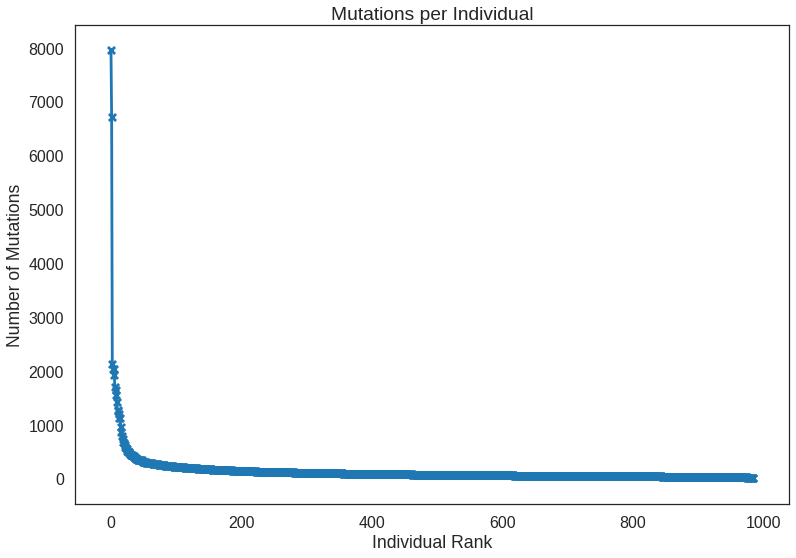

In [26]:
x = np.arange(len(sample_counts))
y = sample_counts.values

plt.plot(y)
plt.scatter(x, y, marker = 'x', s = 50)
plt.title('Mutations per Individual')
plt.xlabel('Individual Rank')
plt.ylabel('Number of Mutations')

plt.savefig(img_dir + 'rank_py.png')
plt.show()

## Bar plot

`Barh()` plots in ascending order by default, so
switch to descending with `invert_yaxis()`

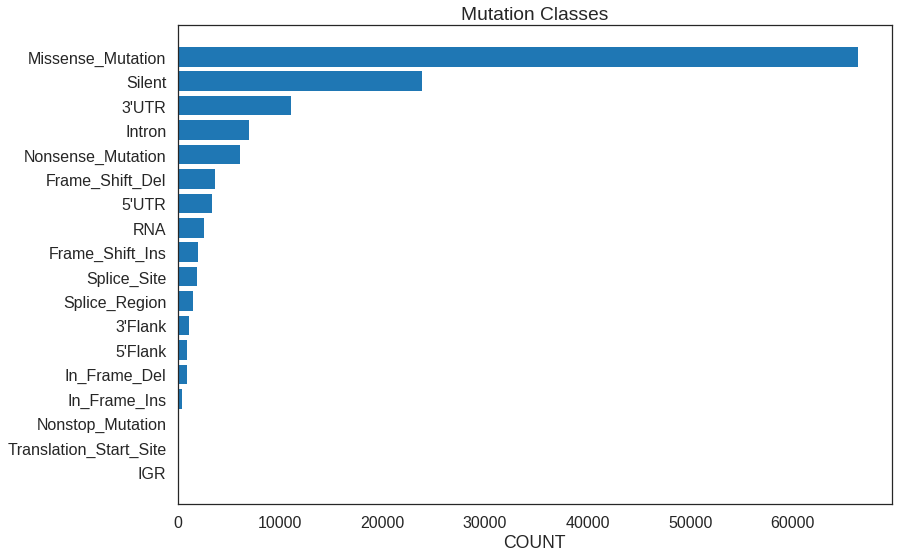

In [27]:
plt.barh(
    range(len(class_counts)),
    class_counts,
    tick_label = class_counts.index,
)
plt.gca().invert_yaxis()
plt.xlabel('COUNT')
plt.title('Mutation Classes')

plt.savefig(img_dir + 'bar_py.png')
plt.show()

## Subplots

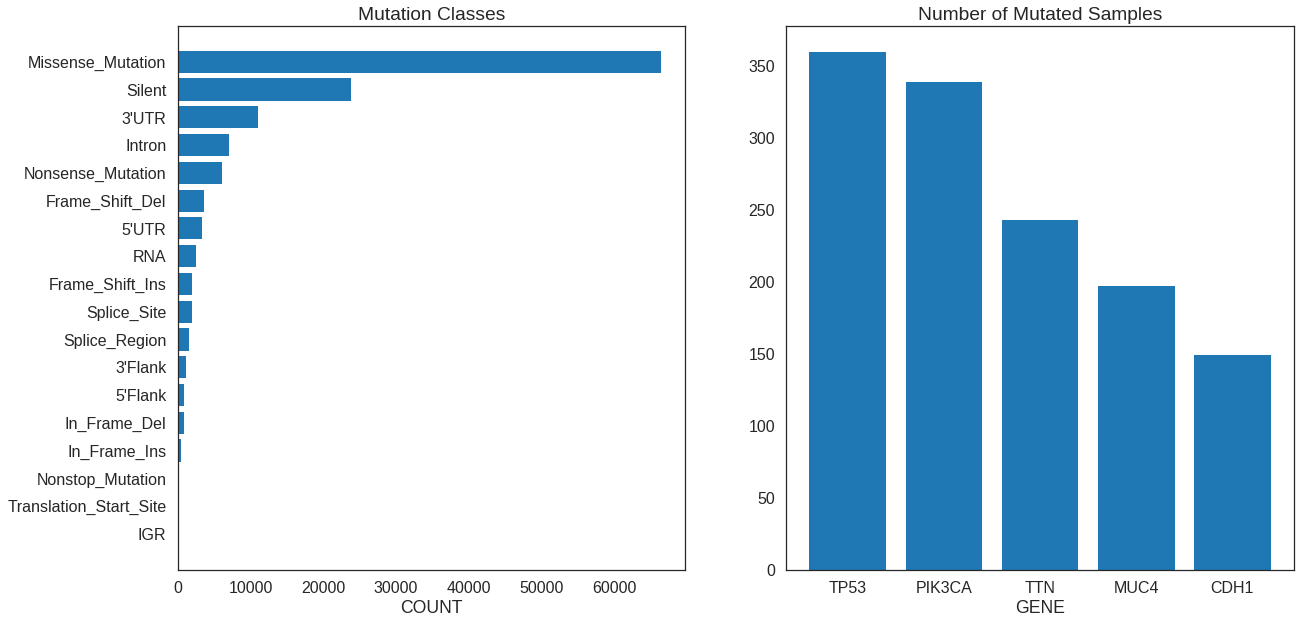

In [28]:
fig, (ax1, ax2) = plt.subplots(
    1, 2, # 1 row, 2 col
    figsize = (20,10) 
)

## First plot
# Same as above barplot
ax1.barh(
    range(len(class_counts)),
    class_counts,
    tick_label = class_counts.index,
)
ax1.invert_yaxis()
ax1.set_xlabel('COUNT')
ax1.set_title('Mutation Classes')

## Second plot
n_genes_to_plot = 5
genes = df_summary['GENE'][0:n_genes_to_plot]
counts = df_summary['N_SAMPLES'][0:n_genes_to_plot]
ax2.bar(
    np.arange(n_genes_to_plot), 
    counts,
    tick_label = genes
)
ax2.set_xlabel('GENE')
ax2.set_title('Number of Mutated Samples')

# plt.tight_layout() # Sometimes useful

plt.savefig(img_dir + 'subplot_py.png')
plt.show()

## Count vs identity

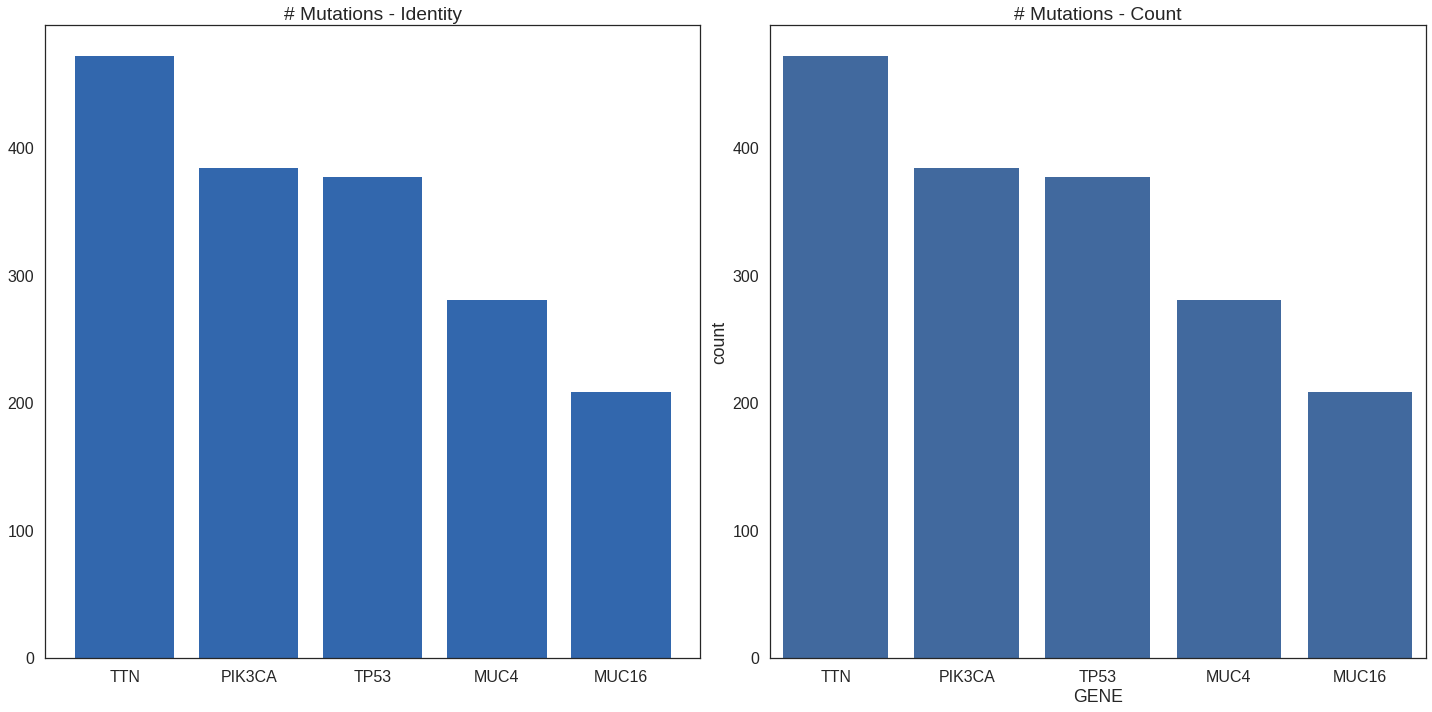

In [29]:
## New df's for plotting
df_identity = df_summary.copy()
df_identity.sort_values(
    'N_MUTATIONS', 
    ascending = False,
    inplace = True
)
df_count = df.copy()

## Plot params
n_genes_to_plot = 5
genes = df_identity['GENE'][0:n_genes_to_plot]
counts = df_identity['N_MUTATIONS'][0:n_genes_to_plot]

## Get axes
fig, (ax1, ax2) = plt.subplots(
    1, 2, 
    figsize = (20,10) 
)

## Identity plot
ax1.bar(
    np.arange(n_genes_to_plot), 
    counts,
    tick_label = genes,
    color = '#3267AD'
)
ax1.set_title('# Mutations - Identity')

## Count plot
sns.countplot(
    x = 'GENE',          
    data = df[df['GENE'].isin(genes)], 
    color = '#3267AD',
    order = genes,
    ax = ax2
)
ax2.set_title('# Mutations - Count')

plt.tight_layout()
plt.savefig(img_dir + 'count_vs_identity_py.png')
plt.show()

## Plot with grouping

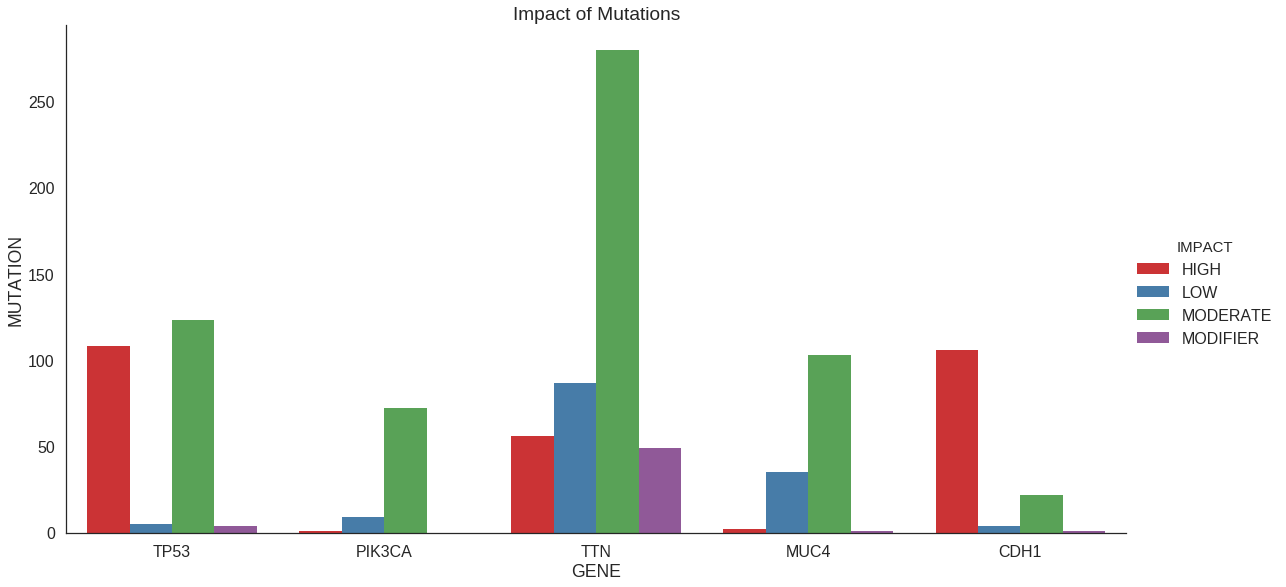

In [30]:
## Plot params
n_genes_to_plot = 5
genes = df_summary['GENE'][0:n_genes_to_plot]

## Filter to relevant data
df_plt = df_impact[df_impact['GENE'].isin(genes)]

## Plot
sns.factorplot(
    x = 'GENE',
    y = 'MUTATION',
    hue = 'IMPACT',
    order = genes,
    palette = 'Set1',
    kind = 'bar',
    size = 8,
    aspect = 2,
    data = df_plt
)
plt.title('Impact of Mutations')

plt.savefig(img_dir + 'group_py.png')
plt.show()

## Faceted plot

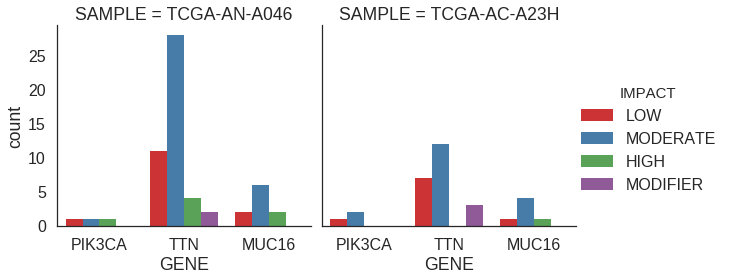

In [31]:
## Get some samples and genes
samples = sample_counts[0:2].index.tolist()
genes = ['PIK3CA', 'TTN', 'MUC16']

## Filter to relevant data
df_plt = df.loc[(df['SAMPLE'].isin(samples)) & (df['GENE'].isin(genes))]

## Plot
sns.factorplot(
    x = 'GENE',
    hue = 'IMPACT',
    order = genes,
    palette = 'Set1',
    kind = 'count',
    col = 'SAMPLE',
    size = 4,
    aspect = 1,
    data = df_plt
)

plt.savefig(img_dir + 'facet_py.png')
plt.show()

## Box plot

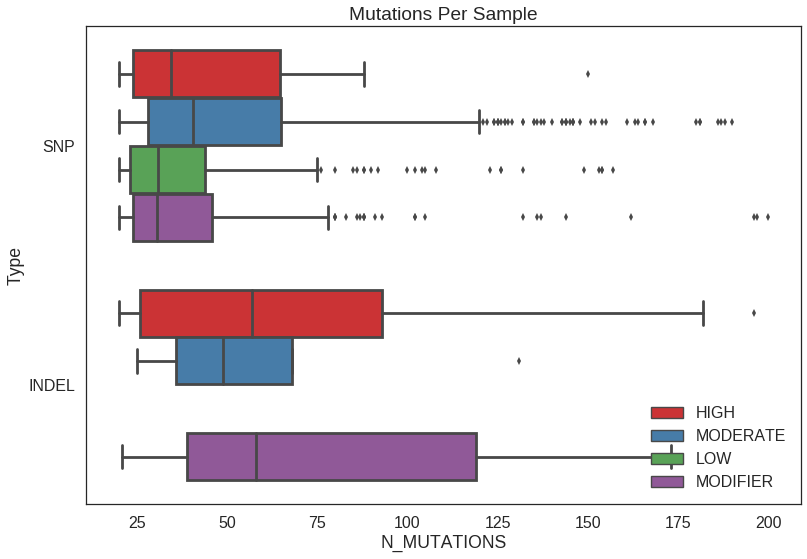

In [32]:
sns.boxplot(
    y = 'TYPE2',
    x = 'N_MUTATIONS',
    hue = 'IMPACT',
    orient = 'h',
    data = df_sample_counts,
    order = ['SNP', 'INDEL'],
    hue_order = ['HIGH', 'MODERATE', 'LOW', 'MODIFIER'],
    palette = 'Set1'
)
plt.title('Mutations Per Sample')
plt.ylabel('Type')
plt.legend(loc=4)

plt.savefig(img_dir + 'box_group_py.png')
plt.show()